Made by : Clarissa B. Kosasih   

# A. EDA

## Data Preprocessing

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# READ DATA WITH TAB SEPARATOR

data = pd.read_csv('1A.tsv', sep='\t')
data.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


In [ ]:
# CHECK DATA TYPES AND INFORMATION

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

The dataset consists of a total of 18 columns; 9 columns with float data types, 1 column with integer data type, and 8 categorical columns. There is a significant amount of missing data, especially in the 'Cholesterol' column.

### Handling Missing Value

In [ ]:
# COUNT MISSING VALUES
na_ammount = data.isna().sum()
na_percentage = (na_ammount / len(data)) * 100

pd.DataFrame({
    'Missing Values': na_ammount,
    'Percentage (%)': na_percentage
})

,Missing Values,Percentage (%)
ID,0,0.000000
Registration Date,0,0.000000
Drug,106,25.358852
Birth Date,0,0.000000
Gender,0,0.000000
Ascites,106,25.358852
Hepatomegaly,106,25.358852
Edema,0,0.000000
Bilirubin,0,0.000000
Cholesterol,338,80.861244


Because 'Cholesterol' columns contains 338 missing value (80.86%), the column will be dropped.

In [ ]:
data = data.drop('Cholesterol', axis=1) # drop column
data.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


'Stage' column will be the y, so the missing values will be deleted too.

In [ ]:
data = data.dropna(subset=['Stage'])
data.isna().sum()

,0
ID,0
Registration Date,0
Drug,100
Birth Date,0
Gender,0
Ascites,100
Hepatomegaly,100
Edema,0
Bilirubin,0
Albumin,0


In [ ]:
# COUNT MISSING VALUES (ROW) LEFT
data.isna().any(axis=1).sum()

106

There is a possibility that the missing values are located within the same rows. Therefore, I want to check the total number of rows containing any missing values to locate patterns.

In [ ]:
data[data.isna().any(axis=1)]

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
5,6,2018/02/03,Placebo,1958/09/08,F,N,Y,N,0.8,3.98,50.0,944.0,93.00,63.0,NaN,11.0,stage_3
57,58,2012/09/26,D-penicillamine,1980/05/17,M,N,N,N,0.7,4.08,73.0,5890.0,56.76,118.0,NaN,10.6,Stage 1
125,126,2022/09/09,D-penicillamine,1971/05/07,F,Y,Y,N,1.2,3.12,NaN,1441.0,165.85,68.0,166.0,11.1,Stage4
128,129,2016/01/29,D-penicillamine,1961/05/01,F,N,Y,N,0.9,3.87,30.0,1009.0,57.35,232.0,NaN,9.7,stage_3
167,168,2017/07/08,Placebo,1977/03/11,F,N,Y,N,0.4,3.80,44.0,842.0,97.65,110.0,NaN,9.2,Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,2023/01/30,NaN,1957/12/11,F,NaN,NaN,N,1.2,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,415,2021/12/04,NaN,1985/12/11,F,NaN,NaN,N,0.9,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,416,2022/01/21,NaN,1967/12/12,F,NaN,NaN,N,1.6,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,417,2023/01/20,NaN,1966/12/11,F,NaN,NaN,N,0.8,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3


There are a many cases where 'Ascites', 'Hepatomegaly', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT' are all NA's in the same row. They might represent tests or conditions not performed or recorded for certain patients.

Since 'Ascites', 'Hepatomegaly', 'Copper', 'Alkaline Phosphatase (U/L)', 'SGOT', and 'Platelets' are closely related to cirrhosis, I decided to delete the rows with missing values. Imputing these missing values could distort the analysis.

In [ ]:
data = data.dropna() # drop rows with missing value
data.isna().any().sum()

0

Data is clean.

### Handling Duplicate Values

In [ ]:
# DROP DUPLICATES
data = data.drop_duplicates()
data.duplicated().sum()

0

### Finding Unique Values

In [ ]:
data.nunique()

,0
ID,306
Registration Date,295
Drug,5
Birth Date,303
Gender,2
Ascites,2
Hepatomegaly,2
Edema,3
Bilirubin,85
Albumin,135


'ID' and 'Registration Date' contains high amount of unique data, we should drop the column

In [ ]:
data = data.drop(['ID', 'Registration Date'], axis=1)
data.head()

,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,D-penicillamine,1968/07/01,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,D-penicillamine,1954/11/15,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,D-penicillamine,1970/03/16,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,Placebo,1986/11/03,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       306 non-null    object 
 1   Birth Date                 306 non-null    object 
 2   Gender                     306 non-null    object 
 3   Ascites                    306 non-null    object 
 4   Hepatomegaly               306 non-null    object 
 5   Edema                      306 non-null    object 
 6   Bilirubin                  306 non-null    float64
 7   Albumin                    306 non-null    float64
 8   Copper                     306 non-null    float64
 9   Alkaline Phospatase (U/L)  306 non-null    float64
 10  SGOT                       306 non-null    float64
 11  Tryglicerides              306 non-null    float64
 12  Platelets                  306 non-null    float64
 13  Prothrombin                306 non-null    float64
 14 

The final dataset consists of 15 columns and 306 rows.

### Feature Engineer Column 'Birth Date'
Instead of birth date, it would be easier to analysize with age.

In [ ]:
# Convert 'Birthdate' column to datetime
data['Birth Date'] = pd.to_datetime(data['Birth Date'], format='%Y/%m/%d')

# Function to calculate age
def calculate_age(birthdate):
    current_date = pd.to_datetime('today')
    age = current_date.year - birthdate.year

    if (current_date.month < birthdate.month) or (current_date.month == birthdate.month and current_date.day < birthdate.day):
        age -= 1
    return age

data['Age'] = data['Birth Date'].apply(calculate_age)
data.head()

,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,D-penicillamine,1966-03-07,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,58
1,D-penicillamine,1968-07-01,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,56
2,D-penicillamine,1954-11-15,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,70
3,D-penicillamine,1970-03-16,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,54
4,Placebo,1986-11-03,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,38


In [ ]:
# Drop column 'Birth Date'
data = data.drop('Birth Date', axis=1)
data.head()

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,D-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,58
1,D-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,56
2,D-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,70
3,D-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,54
4,Placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,38


Column 'Birth Date' is removed and a new column 'Age' is added.

### Numeric Distribution


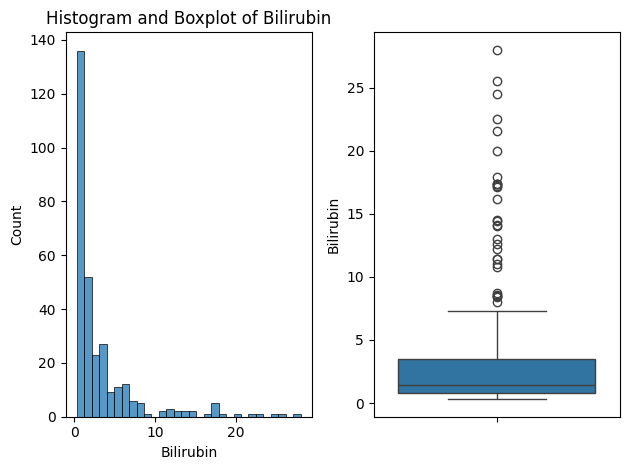

Skewness:  2.817540214492091
Kurtosis:  8.680667490516994


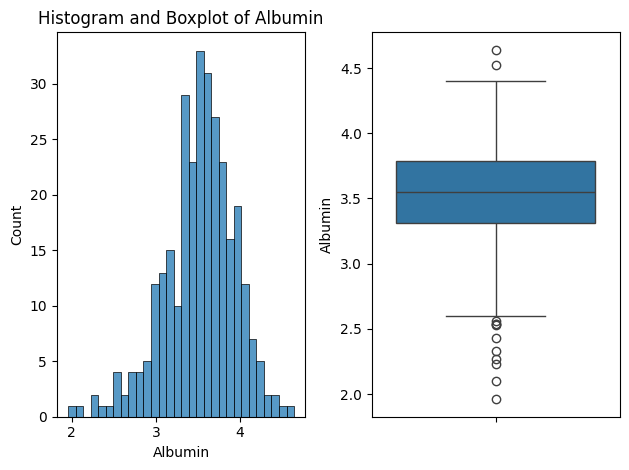

Skewness:  -0.5782674450898165
Kurtosis:  0.9638761384912069


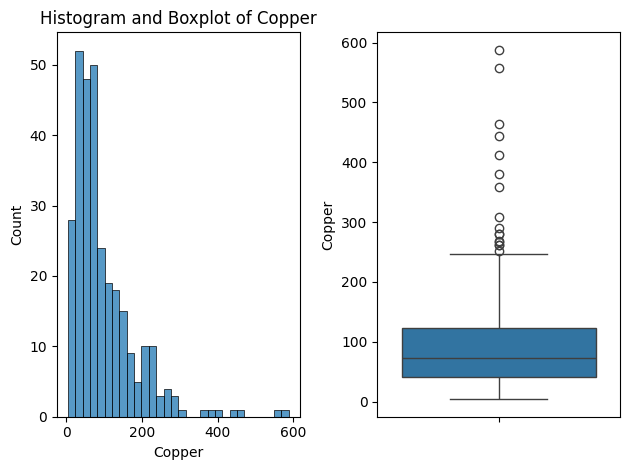

Skewness:  2.2856431823652814
Kurtosis:  7.515563507128517


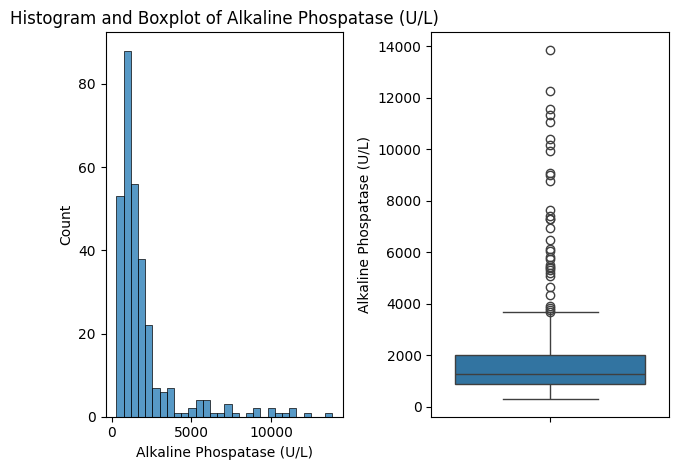

Skewness:  3.005139813159215
Kurtosis:  9.723126571888724


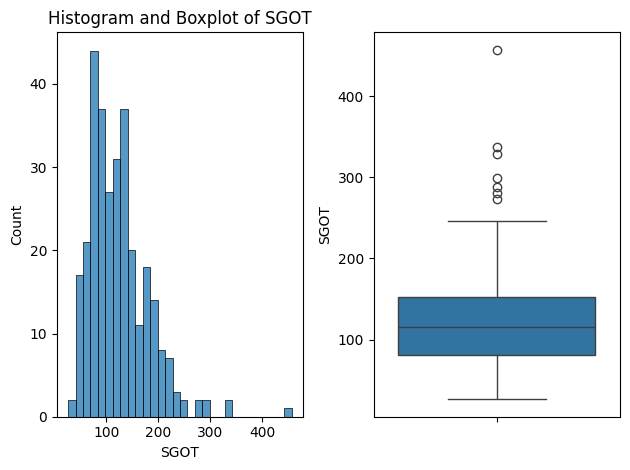

Skewness:  1.4474186250483927
Kurtosis:  4.289812936450611


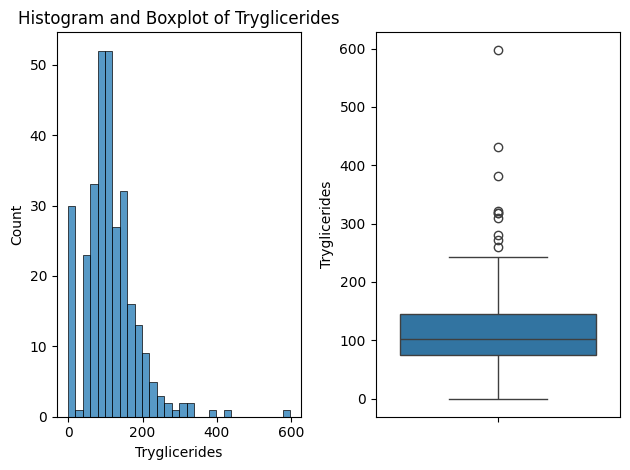

Skewness:  1.673768524651463
Kurtosis:  7.7356324734000665


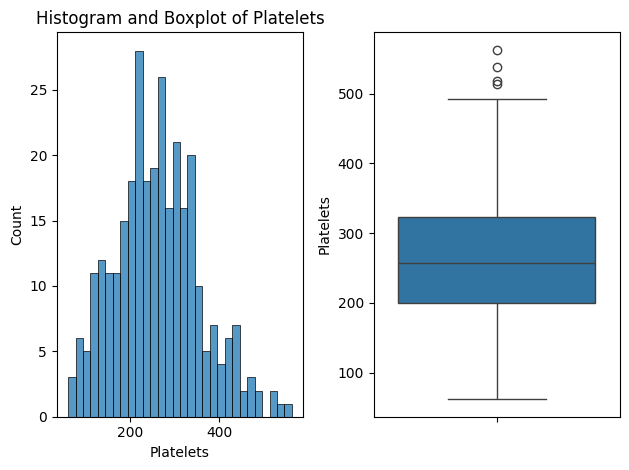

Skewness:  0.3734854844035126
Kurtosis:  -0.005941626677032907


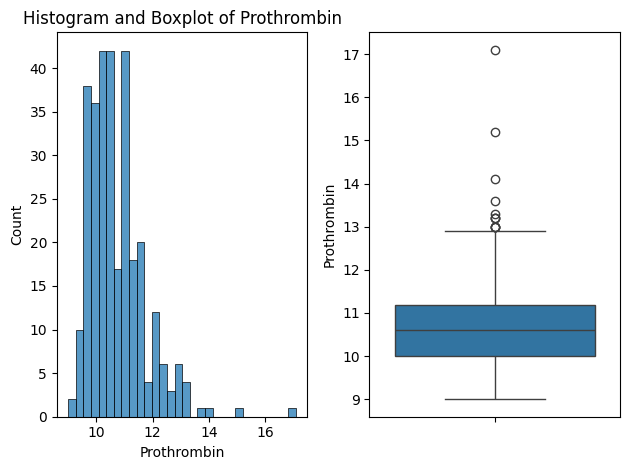

Skewness:  1.7392944630320002
Kurtosis:  6.018483343031384


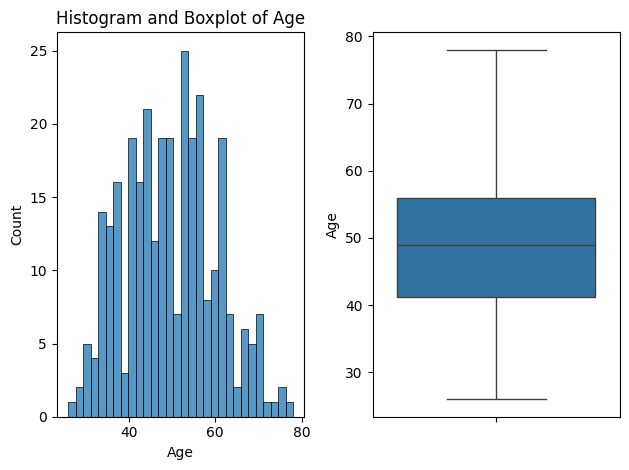

Skewness:  0.1744082615846146
Kurtosis:  -0.5159317765592006


In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns

for i in numerical_cols:
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()
  print("Skewness: ", data[i].skew())
  print("Kurtosis: ", data[i].kurt())

In [ ]:
from scipy.stats import shapiro

for i in numerical_cols:
  print(f'{i}:', shapiro(data[i]))

Bilirubin: ShapiroResult(statistic=0.6260729010311376, pvalue=2.651784631728777e-25)
Albumin: ShapiroResult(statistic=0.9797778235186683, pvalue=0.00025741803714511384)
Copper: ShapiroResult(statistic=0.7900237787922918, pvalue=1.463429754493277e-19)
Alkaline Phospatase (U/L): ShapiroResult(statistic=0.6123021951338488, pvalue=1.0898395204675184e-25)
SGOT: ShapiroResult(statistic=0.9120212343291327, pvalue=2.1411575836744633e-12)
Tryglicerides: ShapiroResult(statistic=0.8889099488770487, pvalue=3.843630049820408e-14)
Platelets: ShapiroResult(statistic=0.9880042168947346, pvalue=0.012354922069453503)
Prothrombin: ShapiroResult(statistic=0.8831713614020146, pvalue=1.552008405912485e-14)
Age: ShapiroResult(statistic=0.9891027031347964, pvalue=0.021678498024431784)


All of the variables tested have p-values below 0.05, they are not normal distributed.

Since none of the numeric columns have a normal distribution and contain outliers, we will use Robust Scaling.

*Note* : outliers are not deleted because this dataset is about medical data and extreme values are clinically possible.

### Categorical Distribution

In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  print(data[col].value_counts())
  print("---------------------")

Drug
D-penicillamine    152
Placebo            149
d-penicillamine      3
placebo              1
lacebo               1
Name: count, dtype: int64
---------------------
Gender
F    271
M     35
Name: count, dtype: int64
---------------------
Ascites
N    283
Y     23
Name: count, dtype: int64
---------------------
Hepatomegaly
Y    156
N    150
Name: count, dtype: int64
---------------------
Edema
N    258
S     28
Y     20
Name: count, dtype: int64
---------------------
Stage
stage_3    118
Stage4     108
Stage 2     65
Stage 1     15
Name: count, dtype: int64
---------------------


There are a few typos and inconsistent naming, which will be handled in the next part. Also, the distribution of stages is not evenly spread, so we will decide between undersampling or oversampling later.

### Handling Data Typo

In [ ]:
data['Drug'] = data['Drug'].replace({'d-penicillamine' : 'D-penicillamine', 'placebo' : 'Placebo', 'lacebo' : 'Placebo'})
data['Drug'].value_counts()

,count
Drug,
D-penicillamine,155
Placebo,151


In [ ]:
data['Stage'] = data['Stage'].replace({'stage_3' : 'Stage 3', 'Stage4' : 'Stage 4'})
data['Stage'].value_counts()

,count
Stage,
Stage 3,118
Stage 4,108
Stage 2,65
Stage 1,15


### Multivariate

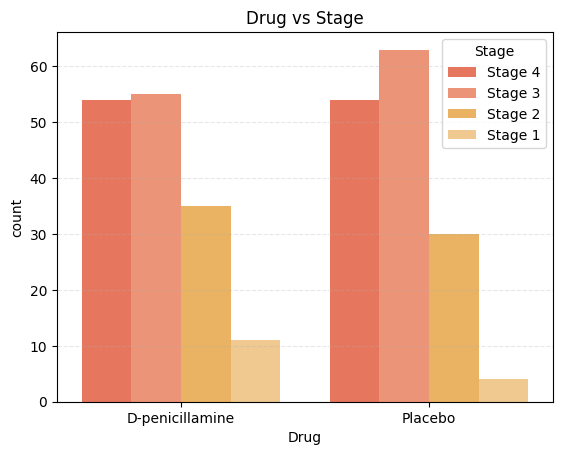

In [ ]:
# DRUG VS STAGE

colors = {'Stage 1': '#FFCC80','Stage 2': '#FFB74D', 'Stage 3': '#FF8A65', 'Stage 4': '#FD6947'}

sns.countplot(x = 'Drug', hue = 'Stage', data = data, palette = colors)
plt.title("Drug vs Stage")
plt.grid(axis = "y", alpha = 0.3, linestyle = "--")
plt.show()

Stages 1 and 2 are mainly treated with D-penicillamine, while Stage 3 has a higher proportion of patients in the Placebo group. In contrast, Stage 4 seems to be evenly distributed between the two drug groups.

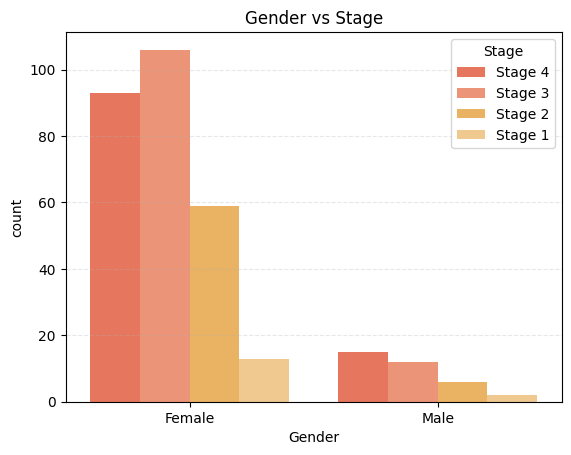

In [ ]:
# GENDER VS STAGE
colors = {'Stage 1': '#FFCC80','Stage 2': '#FFB74D', 'Stage 3': '#FF8A65', 'Stage 4': '#FD6947'}

sns.countplot(x = 'Gender', hue = 'Stage', data = data, palette = colors)
plt.title("Gender vs Stage")
plt.xticks(ticks=['F', 'M'], labels=['Female', 'Male'])

plt.grid(axis = "y", alpha = 0.3, linestyle = "--")
plt.show()

Most of Cirrhosis patient is Female.

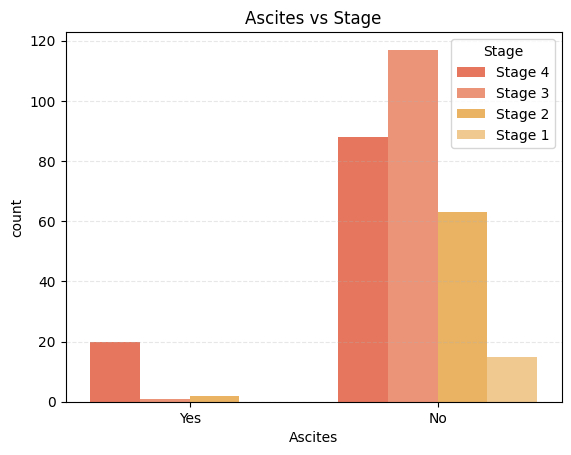

In [ ]:
# ASCITES VS STAGE
colors = {'Stage 1': '#FFCC80','Stage 2': '#FFB74D', 'Stage 3': '#FF8A65', 'Stage 4': '#FD6947'}

sns.countplot(x = 'Ascites', hue = 'Stage', data = data, palette = colors)
plt.title("Ascites vs Stage")
plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])

plt.grid(axis = "y", alpha = 0.3, linestyle = "--")
plt.show()

Ascites is the medical term for the accumulation of fluid in the abdominal cavity (space between diaphragm) and most commonly linked to liver cirrhosis, but it can also result from other diseases. Surprisingly, most of the cases report no ascites.

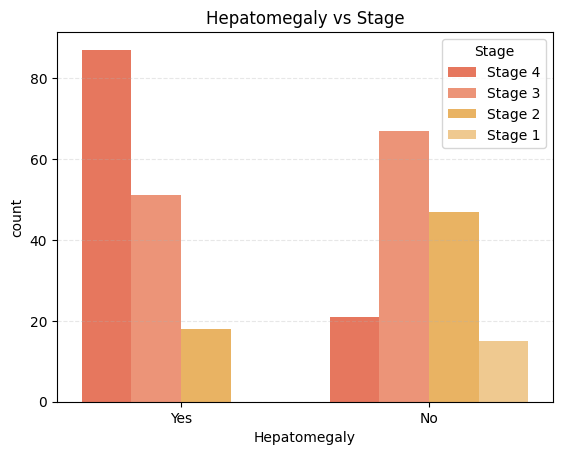

In [ ]:
# HEPATOMEGALY VS STAGE
colors = {'Stage 1': '#FFCC80','Stage 2': '#FFB74D', 'Stage 3': '#FF8A65', 'Stage 4': '#FD6947'}

sns.countplot(x = 'Hepatomegaly', hue = 'Stage', data = data, palette = colors)
plt.title("Hepatomegaly vs Stage")
plt.xticks(ticks=['N', 'Y'], labels=['No', 'Yes'])

plt.grid(axis = "y", alpha = 0.3, linestyle = "--")
plt.show()

Hepatomegaly is enlargement of the liver, which aligns with the plot showing that Stage 4 patients report the highest occurrence of 'Yes' in Hepatomegaly.

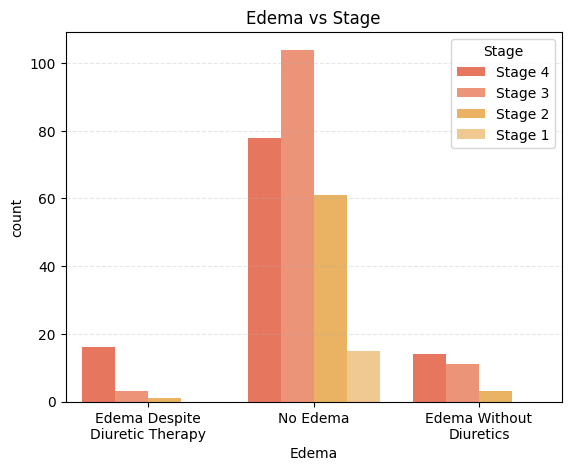

In [ ]:
# EDEMA VS STAGE
colors = {'Stage 1': '#FFCC80','Stage 2': '#FFB74D', 'Stage 3': '#FF8A65', 'Stage 4': '#FD6947'}

sns.countplot(x = 'Edema', hue = 'Stage', data = data, palette = colors)
plt.title("Edema vs Stage")
plt.xticks(ticks=['N', 'S', 'Y'], labels=['No Edema', 'Edema Without\nDiuretics', 'Edema Despite\nDiuretic Therapy'])

plt.grid(axis = "y", alpha = 0.3, linestyle = "--")
plt.show()

Most patients in the dataset show no signs of edema, suggesting that fluid retention is relatively uncommon in this population. It may indicate that the conditions or treatments involved do not typically lead to edema for the majority of patients.

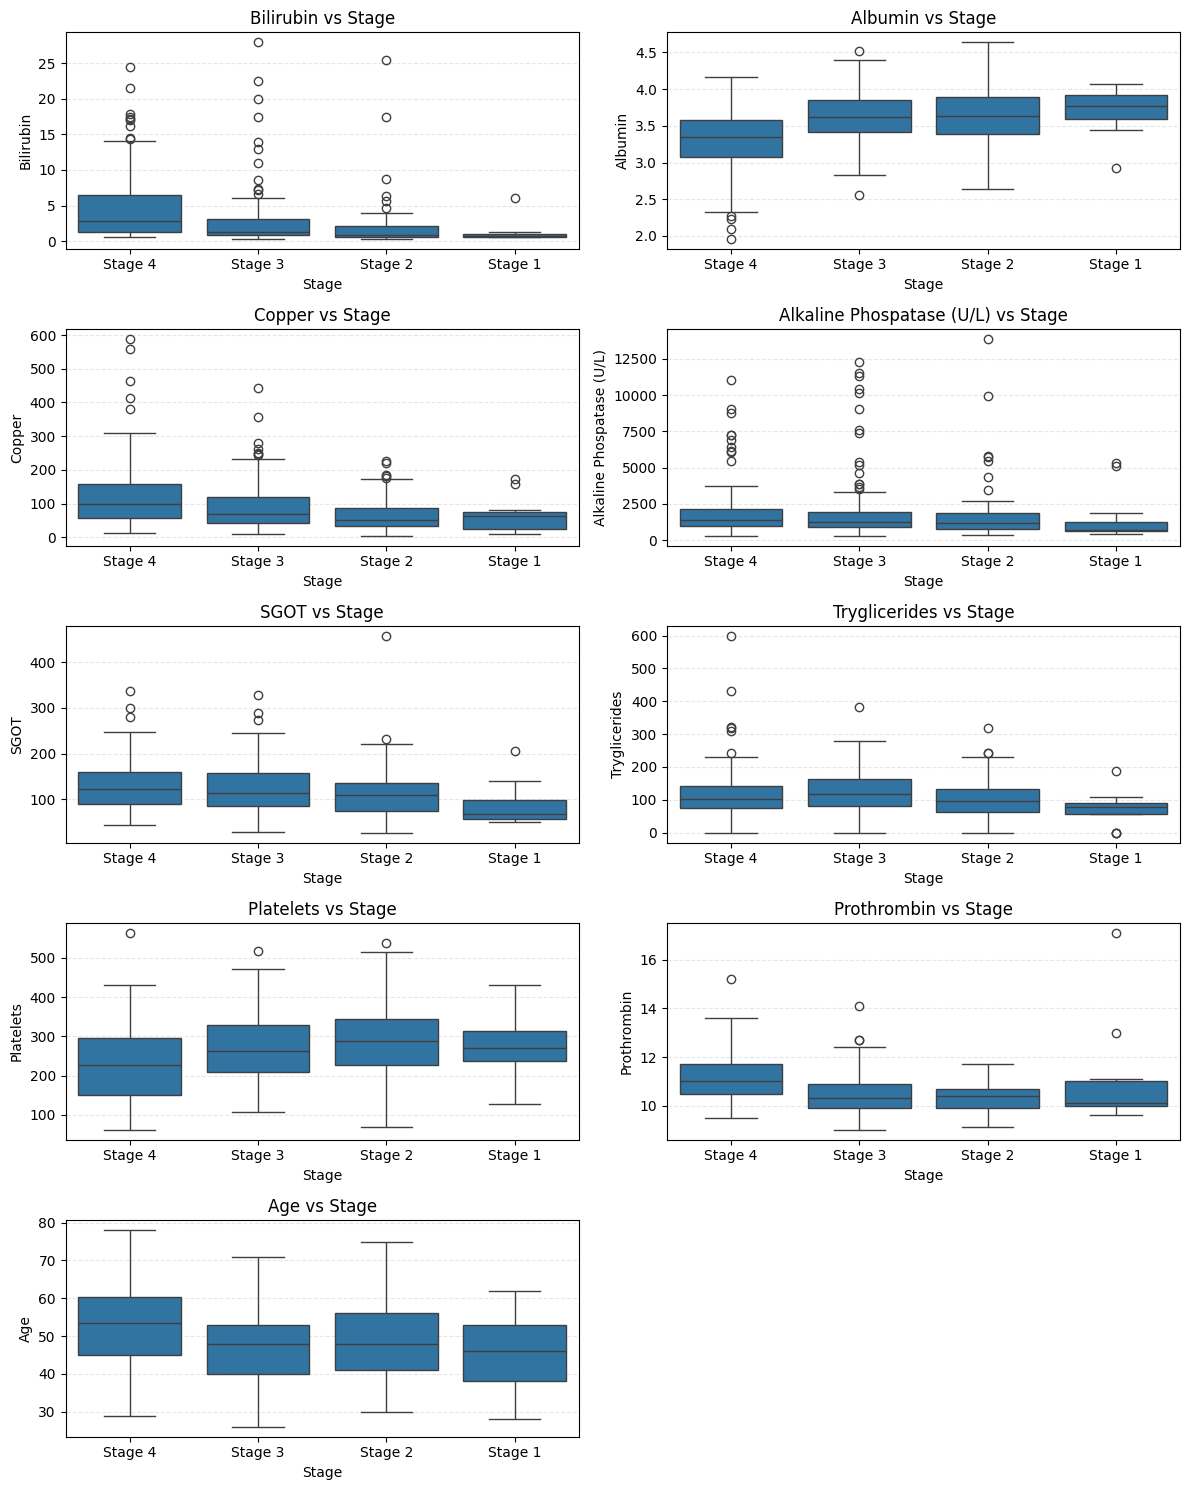

In [ ]:
# NUMERIC COLUMNS VS STAGE
plt.figure(figsize=(12, 15))

for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(5, 2, i)
    sns.boxplot(x = 'Stage', y = col, data = data)
    plt.title(f"{col} vs Stage")
    plt.grid(axis="y", alpha=0.3, linestyle="--")

    plt.tight_layout()

plt.show()

- Bilirubin : The boxplot shows that Stage 4 has the highest median bilirubin level indicating a correlation between elevated bilirubin and disease progression stages.
- Albumin : Albumin is a protein produced by the liver, and its levels in the blood are typically lower in people with liver disease, as shown in the plot.
- Copper: The median value in Stage 1 is higher than in Stage 2, and it continues to rise, with Stage 4 having the highest median.
- Alkaline Phosphatase: Stage 1 shows the lowest median, while Stages 2, 3, and 4 show similar median values.
- SGOT: SGOT levels tend to increase with advancing stages of cirrhosis, though the difference between Stages 2, 3, and 4 is not significant.
- Triglycerides: The highest median is observed in Stage 3.
- Platelets: Stage 2 displays the highest median platelet count.
- Prothrombin: Stage 1 has the lowest median, while Stages 2 and 3 have similar values. Stage 4 has the highest median.
- Age: Stages 1, 2, and 3 have similar median ages, while Stage 4 features a higher median, with the majority of patients being older than 50.

From all the visualization above, it appears that all columns have significant differences across stages. To confirm this, we will perform statistical testing using the Kruskal-Wallis test because the data is not normally distributed.

### Kruskal

In [ ]:
from scipy.stats import kruskal


def kruskal_test(data, numerical_cols):
  for col in numerical_cols:
    stat, p_value = kruskal(data[data['Stage'] == 'Stage 1'][col],
                            data[data['Stage'] == 'Stage 2'][col],
                            data[data['Stage'] == 'Stage 3'][col],
                            data[data['Stage'] == 'Stage 4'][col])
    if p_value < 0.05:
      print(f"{col} is significant")
    else:
      print(f"{col} is not significant")

kruskal_test(data, numerical_cols)


Bilirubin is significant
Albumin is significant
Copper is significant
Alkaline Phospatase (U/L) is significant
SGOT is significant
Tryglicerides is significant
Platelets is significant
Prothrombin is significant
Age is significant


All columns are significant, so no columns will be dropped.

# B. Train a Random Forest and an XGBoost model

## Encode

In [ ]:
for col in categorical_cols:
  print(data[col].value_counts())
  print("---------------------")

Drug
D-penicillamine    155
Placebo            151
Name: count, dtype: int64
---------------------
Gender
F    271
M     35
Name: count, dtype: int64
---------------------
Ascites
N    283
Y     23
Name: count, dtype: int64
---------------------
Hepatomegaly
Y    156
N    150
Name: count, dtype: int64
---------------------
Edema
N    258
S     28
Y     20
Name: count, dtype: int64
---------------------
Stage
Stage 3    118
Stage 4    108
Stage 2     65
Stage 1     15
Name: count, dtype: int64
---------------------


In [ ]:
# BINARY
data['Drug'] = data['Drug'].replace({'D-penicillamine' : 1, 'Placebo' : 0})
data['Gender'] = data['Gender'].replace({'F' : 1, 'M' : 0})
data['Ascites'] = data['Ascites'].replace({'N' : 0, 'Y' : 1})
data['Hepatomegaly'] = data['Hepatomegaly'].replace({'N' : 0, 'Y' : 1})


<ipython-input-30-17d1732db03e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Drug'] = data['Drug'].replace({'D-penicillamine' : 1, 'Placebo' : 0})
<ipython-input-30-17d1732db03e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F' : 1, 'M' : 0})
<ipython-input-30-17d1732db03e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

In [ ]:
# ORDINAL
data['Edema'] = data['Edema'].replace({'N' : 0, 'S' : 1, 'Y' : 2})
data['Stage'] = data['Stage'].replace({'Stage 1' : 1, 'Stage 2' : 2, 'Stage 3' : 3, 'Stage 4' : 4})

<ipython-input-31-a6ddc9c4658a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Edema'] = data['Edema'].replace({'N' : 0, 'S' : 1, 'Y' : 2})
<ipython-input-31-a6ddc9c4658a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Stage'] = data['Stage'].replace({'Stage 1' : 1, 'Stage 2' : 2, 'Stage 3' : 3, 'Stage 4' : 4})


In [ ]:
data.head()

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,1,1,1,1,2,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,58
1,1,1,0,1,0,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,56
2,1,0,0,0,1,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,70
3,1,1,0,1,1,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,54
4,0,1,0,1,0,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,38


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       306 non-null    int64  
 1   Gender                     306 non-null    int64  
 2   Ascites                    306 non-null    int64  
 3   Hepatomegaly               306 non-null    int64  
 4   Edema                      306 non-null    int64  
 5   Bilirubin                  306 non-null    float64
 6   Albumin                    306 non-null    float64
 7   Copper                     306 non-null    float64
 8   Alkaline Phospatase (U/L)  306 non-null    float64
 9   SGOT                       306 non-null    float64
 10  Tryglicerides              306 non-null    float64
 11  Platelets                  306 non-null    float64
 12  Prothrombin                306 non-null    float64
 13  Stage                      306 non-null    int64  
 14 

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('Stage', axis=1)
y = data['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (244, 14)
X_test : (62, 14)
y_train : (244,)
y_test : (62,)


## Scaling
Because Random Forest and XGBoost are based on decision trees, scaling does not significantly impact their performance.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier(random_state = 0)

rf_model = rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print(f'Classification Report:\n{classification_report(y_test, rf_y_pred)}')

Confusion Matrix:
 [[ 0  1  1  0]
 [ 0  4  5  5]
 [ 0  2 14 11]
 [ 0  0  3 16]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.57      0.29      0.38        14
           3       0.61      0.52      0.56        27
           4       0.50      0.84      0.63        19

    accuracy                           0.55        62
   macro avg       0.42      0.41      0.39        62
weighted avg       0.55      0.55      0.52        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The focus point is to reduce late diagnoses (e.g., predicting Stage 2 when the actual stage is Stage 3), we should prioritize recall for critical stages (Stage 3 and Stage 4)

### RF Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [100, 200, 300, 500]
    , 'max_depth' : [5, 10, 20, 30]
    , 'min_samples_split' : [2, 5, 10, 20]
    , 'min_samples_leaf' : [1, 2, 4, 8]
}

rf = RandomForestClassifier(random_state = 0, class_weight = 'balanced')
grid = GridSearchCV(estimator = rf, param_grid = param, cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
rf_pred = best_model.predict(X_test)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


In [ ]:
# Best Parameter and Results for RF

print("Best Parameter:", grid.best_params_)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Best Parameter: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
[[ 0  1  1  0]
 [ 0  4  6  4]
 [ 0  2 17  8]
 [ 0  0  3 16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      0.29      0.38        14
           2       0.63      0.63      0.63        27
           3       0.57      0.84      0.68        19

    accuracy                           0.60        62
   macro avg       0.44      0.44      0.42        62
weighted avg       0.58      0.60      0.57        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model after fine tuning performs better in terms of consistency and fewer misclassifications in Stage 3. Although both models misclassify Stage 3 to some extent, Model after fine tuning offers more reliable predictions, which is especially important when accurate diagnosis is crucial, such as avoiding misdiagnosis of Stage 3 as Stage 4.

Additionally, I also experimented with stratified k-fold and SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalances, but the results still indicate that this model (after fine-tuning) performs better.

Therefore, based on the confusion matrix comparison, the fine-tuned model remains the preferred choice.

### SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state = 0)
grid = GridSearchCV(estimator = rf, param_grid = param, cv = 3, n_jobs = -1, verbose = 1)
grid.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid.best_estimator_
rf_best_pred = best_rf_model.predict(X_test)

# Best Parameter and Results for RF using SMOTE

print("Best Parameter:", grid.best_params_)
print(confusion_matrix(y_test, rf_best_pred))
print(classification_report(y_test, rf_best_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameter: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
[[ 0  1  1  0]
 [ 2  6  1  5]
 [ 1  6  9 11]
 [ 0  1  2 16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.43      0.43      0.43        14
           2       0.69      0.33      0.45        27
           3       0.50      0.84      0.63        19

    accuracy                           0.50        62
   macro avg       0.41      0.40      0.38        62
weighted avg       0.55      0.50      0.49        62



## XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
xgb_model = XGBClassifier(random_state = 0)

# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]
y_test = y_test - 1
y_train = y_train - 1

xgb_model = xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print(f'Classification Report:\n{classification_report(y_test, xgb_y_pred)}')

Confusion Matrix:
 [[ 0  0  1  1]
 [ 1  3  3  7]
 [ 2  3 15  7]
 [ 0  0  2 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.21      0.30        14
           2       0.71      0.56      0.63        27
           3       0.53      0.89      0.67        19

    accuracy                           0.56        62
   macro avg       0.44      0.42      0.40        62
weighted avg       0.59      0.56      0.54        62



### XGBoost Fine Tuning

In [ ]:
param_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(random_state = 0, use_label_encoder=False, eval_metric='logloss')
grid_xgb = GridSearchCV(estimator = xgb_model, param_grid = param_xgb, cv=5, verbose=2, n_jobs=-1)

grid_xgb.fit(X_train, y_train)

best_xgb_model = grid_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Best Parameter and Results for XGBoost
labels = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']

print("Best Parameter:", grid_xgb.best_params_)
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred, target_names = labels))

Best Parameter: {'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
[[ 0  0  1  1]
 [ 1  5  2  6]
 [ 0  2 17  8]
 [ 0  0  2 17]]
              precision    recall  f1-score   support

     Stage 1       0.00      0.00      0.00         2
     Stage 2       0.71      0.36      0.48        14
     Stage 3       0.77      0.63      0.69        27
     Stage 4       0.53      0.89      0.67        19

    accuracy                           0.63        62
   macro avg       0.50      0.47      0.46        62
weighted avg       0.66      0.63      0.61        62



## Comparison between RF (a.k.a Model A) and XGBoost (a.k.a Model B) after fine tuning:
Accuracy:
- Model A: 0.60
- Model B: 0.63  

Precision:
- Model A: Average precision is 0.44 (macro avg) and 0.58 (weighted avg).
- Model B: Average precision is 0.50 (macro avg) and 0.66 (weighted avg).

Recall:
- Model A: Average recall is 0.44 (macro avg) and 0.60 (weighted avg).
- Model B: Average recall is 0.47 (macro avg) and 0.63 (weighted avg).  

F1-Score:
- Model A: Average f1-score is 0.42 (macro avg) and 0.57 (weighted avg).
- Model B: Average f1-score is 0.46 (macro avg) and 0.61 (weighted avg).

Model B shows higher precision, recall, and f1-score across the average and weighted scores, making it a better choice overall, particularly in terms of correctly identifying instances from Stage 2, Stage 3, and Stage 4.

# C. Evaluation results based on at least 3 evaluation metrics
- **Precision**: Model A has a lower average precision compared to Model B, especially in Stage 2 and Stage 3. While Stage 1 has zero precision for both models, the remaining stages show much higher precision in Model B. This indicates that Model B is more accurate in classifying patients correctly for most stages.

- **Recall**: Model B also performs better in terms of recall, especially in Stage 4, where it has a recall of 0.89. This means that Model B is better at correctly identifying patients for Stage 4.

- **F1 Score**: Model B achieves higher F1-Score across all stages except Stage 4, where the scores are very close. Overall, Model B provides a better balance between precision and recall, resulting in higher F1-Score. This metric combines precision and recall, so Model B performs better in balancing the two.

- **Confusion Matrix** :  both misdiagnose stage 1, there is minor improvement in stage 2 and 4 in Model B (XGBoost)


# D. Which features can be considered important

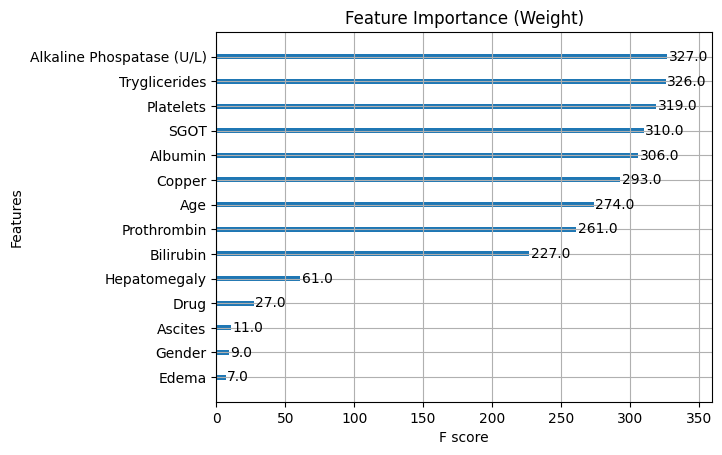

In [ ]:
from xgboost import plot_importance

plot_importance(best_xgb_model, importance_type='weight')
plt.title("Feature Importance (Weight)")
plt.show()

Weight represents how often a feature is used in splitting nodes across trees, so a higher value means that the feature was used more often to split the data, making it more important.

There is a significant drop from 'Bilirubin' (227.0) to 'Hepatomegaly' (61.0), and The next declines is from 'Hepatomegaly' to 'Drug' (27.0). This indicates that there are 9 important features:
- Alkaline Phospatase
- Tryglicerides
- Platelets
- SGOT
- Albumin
- Copper
- Age
- Prothrombin
- Bilirubin

In medical terms, these features collectively reflect liver function, metabolic processes, and the body’s ability to regulate toxins, nutrients, and clotting.


## Final Conclusion
Although there is improvement by using XGBoost, it's not the final solution. The model still has room for further enhancement. A few factors that can be utilized to improve the model include:
- Larger dataset to learn more diverse patterns
- Handling Class Imbalance
- Ensemble with Other Models
- Tuning hyperparameters